In [1]:
import sympy as sym

In [2]:
f = sym.Function('f')
x, h = sym.symbols('x, h')

In [6]:
f1_točno = f(x+h).series(h, n=3)

In [9]:
f1_točno

f(x) + h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x) + h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x)/2 + O(h**3)

In [20]:
f1_točno.doit()

f(x) + h*Derivative(f(x), x) + h**2*Derivative(f(x), (x, 2))/2 + O(h**3)

In [8]:
f1_točno.removeO()

h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x)/2 + h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x) + f(x)

In [10]:
f1_točno.getO()

O(h**3)

In [21]:
def razlika(n=3):
    return f(x+h).series(h, n=n).doit() - f(x-h).series(h, n=n).doit()

In [22]:
razlika()

2*h*Derivative(f(x), x) + O(h**3)

In [23]:
sym.Eq(f(x+h)-f(x-h), razlika())

Eq(-f(-h + x) + f(h + x), 2*h*Derivative(f(x), x) + O(h**3))

In [27]:
f1_cent_točno =\
    sym.solve(
        sym.Eq(f(x+h)-f(x-h), razlika()),
        f(x).diff(x)
    )[0]

In [35]:
f1_cent_0 = f1_cent_točno.expand().getO()
f1_cent_ocena = f1_cent_točno.expand().removeO()

In [36]:
f1_cent_0

O(h**2)

In [37]:
f1_cent_ocena

-f(-h + x)/(2*h) + f(h + x)/(2*h)

In [43]:
f(x-h).series(h, n=5).doit()

f(x) - h*Derivative(f(x), x) + h**2*Derivative(f(x), (x, 2))/2 - h**3*Derivative(f(x), (x, 3))/6 + h**4*Derivative(f(x), (x, 4))/24 + O(h**5)

In [48]:
def vsota(n=4):
    return f(x+h).series(h, n=n).doit() + f(x-h).series(h, n=n).doit()

In [49]:
vsota()

2*f(x) + h**2*Derivative(f(x), (x, 2)) + O(h**4)

In [50]:
f2_cent_točno =\
    sym.solve(
        sym.Eq(f(x+h)+f(x-h), vsota()),
        f(x).diff(x,2)
    )[0]

In [52]:
f2_cent_točno.expand()

f(h + x)/h**2 + f(-h + x)/h**2 - 2*f(x)/h**2 + O(h**2)

In [53]:
f2_cent_0 = f2_cent_točno.expand().getO()
f2_cent_ocena = f2_cent_točno.expand().removeO()

In [54]:
f2_cent_0

O(h**2)

In [55]:
f2_cent_ocena

-2*f(x)/h**2 + f(-h + x)/h**2 + f(h + x)/h**2

In [56]:
razlika(n=5)

2*h*Derivative(f(x), x) + h**3*Derivative(f(x), (x, 3))/3 + O(h**5)

In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
x = np.linspace(0, 2*np.pi, 9)
y = np.sin(x)

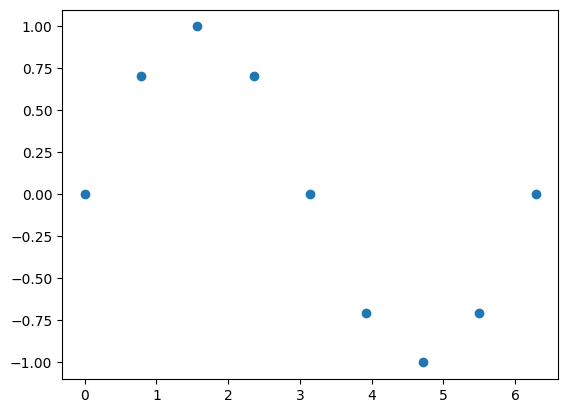

In [64]:
plt.plot(x, y, 'o');

In [65]:
x

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265,
       3.92699082, 4.71238898, 5.49778714, 6.28318531])

In [66]:
y

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.44929360e-16])

In [71]:
h = x[1] - x[0]
f_ocena_h = (-0.5 * y[3] + 0.5*y[5])/h
f_ocena_2h = (-0.5 * y[2] + 0.5*y[6])/(2*h)

In [72]:
f_ocena_h

-0.9003163161571061

In [73]:
f_ocena_2h

-0.6366197723675814

In [74]:
(4*f_ocena_h-f_ocena_2h)/3

-0.9882151640869475